In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/adult-census-income")

print("Path to dataset files:", path)

/Users/jeongho/Desktop/w25536-kaggle/kaggle/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Path to dataset files: /Users/jeongho/.cache/kagglehub/datasets/uciml/adult-census-income/versions/3


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

import tensorflow as tf

In [3]:
df = pd.read_csv(os.path.join(path, "adult.csv"))

In [4]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
df.isin(["?"]).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [8]:
df["workclass"].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [9]:
df["occupation"].unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [10]:
df["native.country"].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [11]:
df = df.replace("?", np.NaN)

In [12]:
df = df.drop(["education"], axis=1)

In [13]:
# Get list of categorical columns
categorical_features = df.select_dtypes(include=["object"]).columns

categorical_features

Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'native.country', 'income'],
      dtype='object')

In [14]:
def get_uniques(df, columns):
    uniques = dict()
    for column in columns:
        uniques[column] = list(df[column].unique())

    return uniques

In [15]:
get_uniques(df, categorical_features)

{'workclass': [nan,
  'Private',
  'State-gov',
  'Federal-gov',
  'Self-emp-not-inc',
  'Self-emp-inc',
  'Local-gov',
  'Without-pay',
  'Never-worked'],
 'marital.status': ['Widowed',
  'Divorced',
  'Separated',
  'Never-married',
  'Married-civ-spouse',
  'Married-spouse-absent',
  'Married-AF-spouse'],
 'occupation': [nan,
  'Exec-managerial',
  'Machine-op-inspct',
  'Prof-specialty',
  'Other-service',
  'Adm-clerical',
  'Craft-repair',
  'Transport-moving',
  'Handlers-cleaners',
  'Sales',
  'Farming-fishing',
  'Tech-support',
  'Protective-serv',
  'Armed-Forces',
  'Priv-house-serv'],
 'relationship': ['Not-in-family',
  'Unmarried',
  'Own-child',
  'Other-relative',
  'Husband',
  'Wife'],
 'race': ['White',
  'Black',
  'Asian-Pac-Islander',
  'Other',
  'Amer-Indian-Eskimo'],
 'sex': ['Female', 'Male'],
 'native.country': ['United-States',
  nan,
  'Mexico',
  'Greece',
  'Vietnam',
  'China',
  'Taiwan',
  'India',
  'Philippines',
  'Trinadad&Tobago',
  'Canada',
  

In [16]:
binary_features = ["sex"]

nominal_features = [
    "workclass",
    "marital.status",
    "occupation",
    "relationship",
    "race",
    "native.country",
]

ordinal_features = []  # education is gone maybe you could add here

In [17]:
def binary_encode(df, columns):
    label_encoder = LabelEncoder()
    for column in columns:
        df[column] = label_encoder.fit_transform(df[column])
    return df


def onehot_encode(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

In [18]:
df = binary_encode(df, binary_features)
df = onehot_encode(df, nominal_features)

In [19]:
(df.dtypes == "object").sum()

1

In [20]:
y = df["income"]
X = df.drop(["income"], axis=1)

In [21]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y_mappings = {index: label for index, label in enumerate(label_encoder.classes_)}

In [22]:
y_mappings

{0: '<=50K', 1: '>50K'}

In [23]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [24]:
X

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,Federal-gov,Local-gov,Never-worked,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,1.000000,0.043987,0.533333,0.0,0.0,1.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.890411,0.081896,0.533333,0.0,0.0,1.000000,0.173469,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.671233,0.118021,0.600000,0.0,0.0,1.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.506849,0.086982,0.200000,0.0,0.0,0.895317,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.328767,0.171404,0.600000,0.0,0.0,0.895317,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,0.202298,0.600000,1.0,0.0,0.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,0.136986,0.166404,0.733333,0.0,0.0,0.000000,0.377551,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,0.315068,0.096500,0.533333,1.0,0.0,0.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,0.561644,0.094827,0.533333,0.0,0.0,0.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [38]:
inputs = tf.keras.Input(shape=(88,))
x = tf.keras.layers.Dense(16, activation="relu")(inputs)
x = tf.keras.layers.Dense(16, activation="relu")(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

metrics = [
    tf.keras.metrics.BinaryAccuracy(name="acc"),
    tf.keras.metrics.AUC(name="auc"),
]

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=metrics)

batch_size = 32
epochs = 9

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0,
)

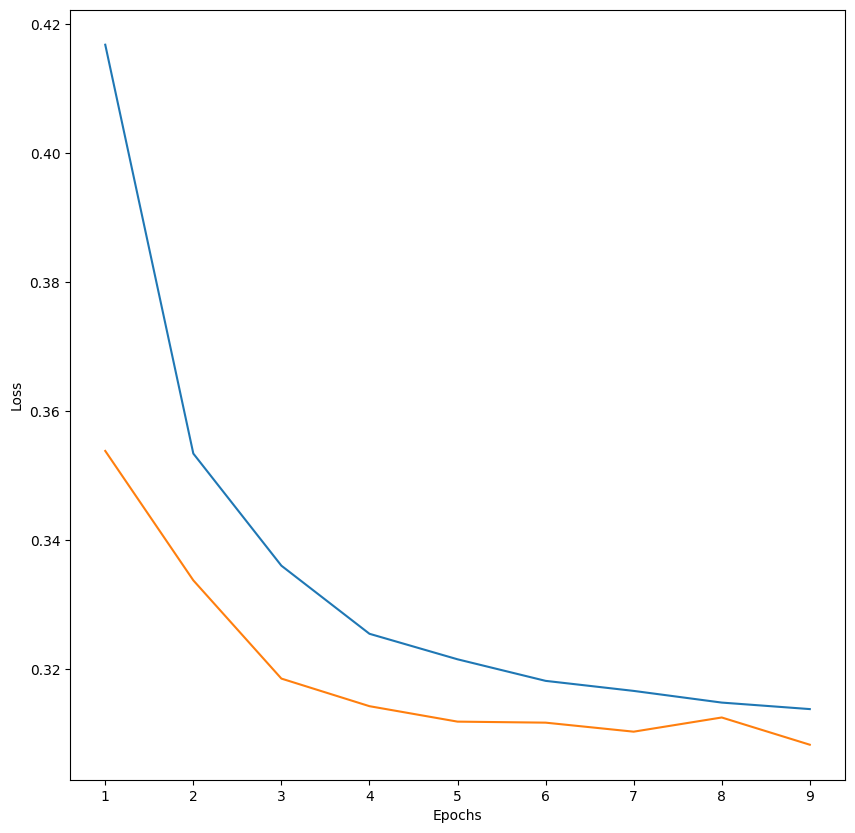

In [39]:
plt.figure(figsize=(10, 10))

epochs_range = range(1, epochs + 1)
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend


plt.show()

In [40]:
np.argmin(val_loss)

8

In [41]:
model.evaluate(X_test, y_test)

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - acc: 0.8410 - auc: 0.9009 - loss: 0.3313


[0.32660597562789917, 0.8410870432853699, 0.9053516387939453]

In [42]:
y.sum() / len(
    y
)  # percenage of postive value so assumming by accurarcy isn't the right way. Hence, observe auc instead!!!

0.2408095574460244